# Introducción al descenso por gradiente

(Ejercicio, 1 punto posible)

El descenso por gradiente se basa en la idea de que, para encontrar un mínimo local (o global) de una función de costo, es posible moverse iterativamente en la dirección opuesta al gradiente de la función en cada punto. El gradiente indica la dirección de mayor incremento de la función, por lo que moverse en la dirección contraria reduce el valor de la función.

El descenso por gradiente sigue estos pasos:

1. **Inicialización**:
   Se comienza con una estimación inicial de los parámetros del modelo, que podrían ser asignados aleatoriamente. Estos parámetros son las variables que se ajustan para minimizar la función de costo.

2. **Cálculo del Gradiente**:
   En cada iteración, se calcula el gradiente de la función de costo con respecto a los parámetros. El gradiente es un vector que señala en la dirección de mayor incremento de la función.

3. **Actualización de Parámetros**:
   Los parámetros del modelo se ajustan moviéndose en la dirección opuesta al gradiente. Esto se hace de acuerdo con la siguiente fórmula:
   $
   \theta := \theta - \eta \nabla_{\theta} f
   $

   Donde:
   - $\theta$ es el parámetro de la función.
   - $\nabla_{\theta} f$ es el gradiente de la función con respecto a los parámetros.
   - $\eta $ es la **tasa de aprendizaje**, que controla el tamaño del paso que se da en cada iteración.

4. **Repetición**:
   Este proceso se repite hasta que se alcanza un criterio de parada, que puede ser:
   - Que los cambios en los parámetros sean muy pequeños.
   - Que el valor de la función de costo se estabilice.
   - Un número máximo de iteraciones.

jivg.org

## Implementación



En este ejemplo usaremos la función:

$$
y = x^2
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#función objetivo:
def f(x):
    return x**2

# derivada de la función objetivo:
def df(x):
    return 2*x

Recuerda que la regla del descenso general es

$$
    \theta = \theta - tasa * derivada(\theta)
$$

In [2]:
# TODO: Implemente la función del descenso por gradiente que calcula el siguiente valor del parámetro x usando la derivada de la función objetivo.
def gradient_descent_update(x, learning_rate):
    return x - learning_rate * df(x)

In [16]:
# Prueba del método de descenso por gradiente

# Inicialización de x
x = 5
# Hiperparámetro de tasa de aprendizaje
tasa = 0.1
# Número de iteraciones
n_iter = 1

history = []
history.append(x)
for i in range(n_iter):
    x = gradient_descent_update(x, tasa)
    history.append(x)

print(f'Historial de valores de x: {history}')

Historial de valores de x: [5, 4.0]


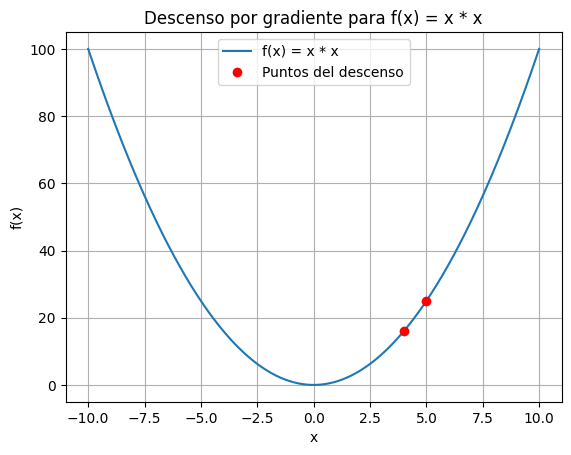

In [15]:
# Generate x values
x = np.linspace(-10, 10, 400)

# Compute y values
y = f(x)

# Plot the function
plt.plot(x, y, label='f(x) = x * x')
plt.plot(history, [f(val) for val in history], 'ro', label='Puntos del descenso')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Descenso por gradiente para f(x) = x * x')
plt.legend()
plt.grid(True)
plt.savefig('output/gradient_descent_1D.png')
plt.show()


In [ ]:
# animación 

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ax.plot(x, y, label='f(x) = x * x')
point, = ax.plot([], [], 'ro', label='Descenso')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Descenso por gradiente para f(x) = x * x')
ax.legend()
ax.grid(True)

def init():
    point.set_data([], [])
    return point,

def update(frame):
    point.set_data(history[frame], f(history[frame]))
    return point,

ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True, repeat=False)

ani.save('descenso_gradiente.gif', writer='pillow')
